## This Notebook is about:
<ul>
    <li>Measure model performance</li>
    <li>Cross-validation</li>
    <li>Regularization(Lasso & Ridge)</li>
    <li>ROC & AUC</li>
    <li>Hyperparameters tuning(GridsearchCV & RandomizedSearch)</li>
    <li>Imputation</li>
    <li>Piplelines</li>
</ul>

In [2]:
import numpy as np
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [4]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
type(iris.data)

numpy.ndarray

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### Exploratory data analysis

In [7]:
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


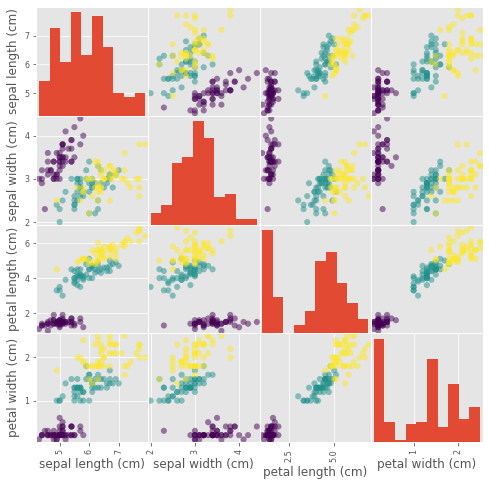

In [8]:
# c parameter stands for color
_ = pd.plotting.scatter_matrix(df, c=y, figsize=[8, 8], s=150, marker='.')

**KNN**<br>
Requires no missing values of the dataset<br>
Requires the features takes on continous values

In [9]:
# The classification challenge
from sklearn.neighbors import KNeighborsClassifier                    

knn = KNeighborsClassifier(n_neighbors=6)
# Trian the model
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(n_neighbors=6)

In [10]:
# each row in the np array represents a single observation
# it It predicts one, which corresponds to 'versicolor' for the first two observations and 0, 
# which corresponds to 'setosa' for the third.

X_new = np.array([[5.6, 2.8, 3.9, 1.1], 
                  [5.7, 2.6, 3.8, 1.3], 
                  [4.7, 3.2, 1.3, 0.2]])
knn.predict(X_new)

array([1, 1, 0])

**Measuring model performance**<br>
So we need a matric

In [11]:
from sklearn.model_selection import train_test_split
# default test_size is 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(predictions)

[2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [12]:
# Check the accuracy
knn.score(X_test, y_test)

0.9555555555555556

**The digits recognition dataset**

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

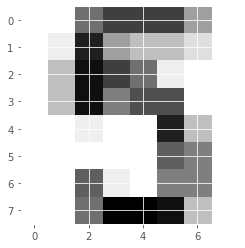

In [13]:
# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
# Display the 1011th image using
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [14]:
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


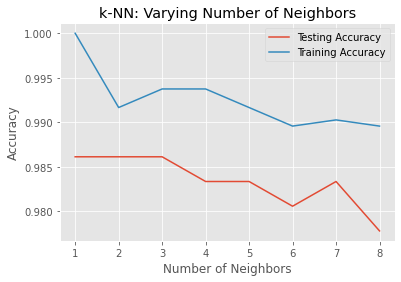

In [15]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

**Introduction to regression**

In [16]:
boston = datasets.load_boston()

In [17]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [18]:
boston = pd.read_csv('boston.csv')

In [19]:
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

X_rooms = X[:, 5]

y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)

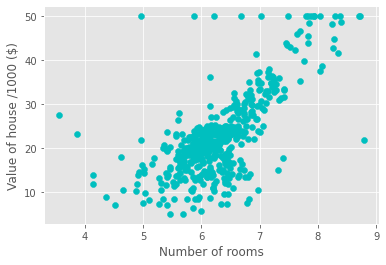

In [20]:
plt.scatter(X_rooms, y, color='c')
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

In [21]:
# Fitting a regression model
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_rooms, y)

x_test = np.linspace(min(X_rooms), max(X_rooms))
y_predicted = reg.predict(x_test)

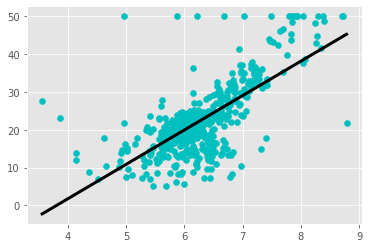

In [22]:
plt.scatter(X_rooms, y, color='c')
plt.plot(x_test, y_predicted, color='black', linewidth=3)
plt.show()

In [23]:
df_gm = pd.read_csv('gm_2008_region.csv')

y = df_gm['life'].values
X = df_gm['fertility'].values

# Print the dimensions of y and X before reshaping
print("Dimensions of y before reshaping: ", y.shape)
print("Dimensions of X before reshaping: ", X.shape)

# Reshape X and y
y_reshaped = y.reshape(-1, 1)
X_reshaped = X.reshape(-1, 1)

# Print the dimensions of y_reshaped and X_reshaped
print("Dimensions of y after reshaping: ", y_reshaped.shape)
print("Dimensions of X after reshaping: ", X_reshaped.shape)

Dimensions of y before reshaping:  (139,)
Dimensions of X before reshaping:  (139,)
Dimensions of y after reshaping:  (139, 1)
Dimensions of X after reshaping:  (139, 1)


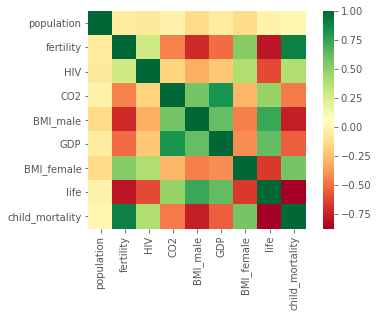

In [24]:
sns.heatmap(df_gm.corr(), square=True, cmap='RdYlGn')
plt.show()

**Cross-validation**

In [25]:
X = iris.data
y = iris.target

In [26]:
from sklearn.model_selection import cross_val_score

reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5)
print(cv_results)
print(cv_results.mean())

[0.         0.85124923 0.         0.76155439 0.        ]
0.3225607248900085


**Regularized regression**<br>
For reporting important features<br>
- Ridge
- Lasso

In [27]:
from sklearn.linear_model import Ridge
# Ridge regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
ridge = Ridge(alpha=0.1, normalize=True )
ridge.fit(X_train, y_train)
ridge.predict(X_test)

array([ 1.23383909,  0.05535763,  2.30441157,  1.32881189,  1.38998091,
        0.11832871,  1.04412566,  1.85808318,  1.45121691,  1.08990671,
        1.66891738, -0.01936573, -0.02999441, -0.01209854, -0.0120811 ,
        1.3673432 ,  1.92860921,  1.06067976,  1.22761159,  1.91930485,
        0.03022978,  1.54242058,  0.11543795,  1.86855366,  1.88056581,
        1.88164459,  1.81602517,  1.98109548,  0.08213666,  0.05145194,
       -0.14714464, -0.02590263,  1.26465724,  0.00347552, -0.0395482 ,
        1.70162182,  1.30175555, -0.00962585, -0.05410734, -0.15632989,
        1.66151676,  1.29960239,  1.36949636,  0.0023094 , -0.03115009])

In [28]:
ridge.score(X_test, y_test)

0.9382149217717047

In [29]:
from sklearn.linear_model import Lasso
# Ridge regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
lasso = Lasso(alpha=0.1, normalize=True )
lasso.fit(X_train, y_train)
lasso.predict(X_test)

array([1.05714286, 1.05714286, 1.05714286, 1.05714286, 1.05714286,
       1.05714286, 1.05714286, 1.05714286, 1.05714286, 1.05714286,
       1.05714286, 1.05714286, 1.05714286, 1.05714286, 1.05714286,
       1.05714286, 1.05714286, 1.05714286, 1.05714286, 1.05714286,
       1.05714286, 1.05714286, 1.05714286, 1.05714286, 1.05714286,
       1.05714286, 1.05714286, 1.05714286, 1.05714286, 1.05714286,
       1.05714286, 1.05714286, 1.05714286, 1.05714286, 1.05714286,
       1.05714286, 1.05714286, 1.05714286, 1.05714286, 1.05714286,
       1.05714286, 1.05714286, 1.05714286, 1.05714286, 1.05714286])

In [30]:
lasso.score(X_test, y_test)

-0.05232862375719538

In [31]:
# Contains the coefficients of features
len(lasso.coef_)

4

In [32]:
X_test.shape

(45, 4)

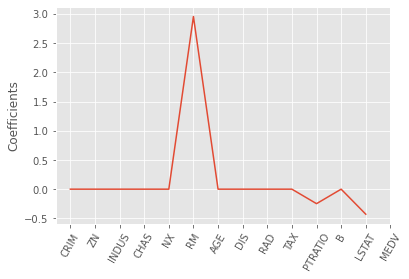

In [33]:
"""
    lasso regression is that it can be used to select important features of a dataset. 
    This is because it tends to shrink the coefficients of less important features to be exactly zero. 
    The features whose coefficients are not shrink to zero are 'selected' by the LASSO algorithm.
"""
bosten = datasets.load_boston()
columns = boston.columns
X = boston.drop('MEDV', axis=1)
y = boston['MEDV']
lasso = Lasso(alpha=0.1, normalize=True)
lasso_coef = lasso.fit(X, y).coef_

plt.plot(range(len(columns)-1), lasso_coef)
plt.xticks(range(len(columns)) ,columns, rotation=60)
plt.ylabel('Coefficients')
plt.show()

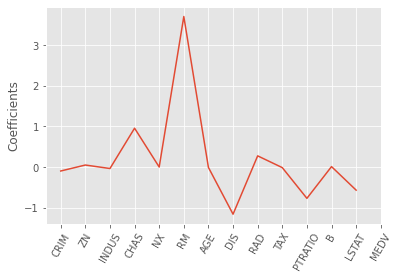

In [34]:
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

plt.plot(range(len(columns)-1), lasso_coef)
plt.xticks(range(len(columns)) ,columns, rotation=60)
plt.ylabel('Coefficients')
plt.show()

In [35]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

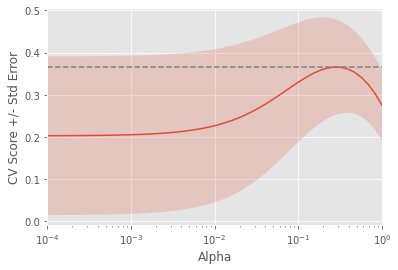

In [36]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

**Confusion matrix**

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

X = iris.data
y = iris.target

knn = KNeighborsClassifier(n_neighbors=8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [38]:
confusion_matrix(y_test, predictions)

array([[23,  0,  0],
       [ 0, 19,  0],
       [ 0,  1, 17]], dtype=int64)

In [39]:
print( (y_test, predictions))

(array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1]), array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1]))


**Logistic regression and the ROC curve**

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

diabetes = pd.read_csv('diabetes.csv')

X = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']

# scaler = preprocessing.StandardScaler()
# X = scaler.fit_transform(X)
# y = scaler.fit_transform(y)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.4, 
                                                    random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression(max_iter=1e6)

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))

[[168  38]
 [ 36  66]]


In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       206
           1       0.63      0.65      0.64       102

    accuracy                           0.76       308
   macro avg       0.73      0.73      0.73       308
weighted avg       0.76      0.76      0.76       308



In [42]:
# Building a logistic regression model
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

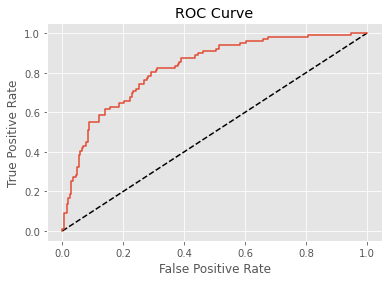

In [43]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [44]:
# AUC
cv_auc = cross_val_score(logreg, X, y, cv=5,scoring='roc_auc')
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.81240741 0.80777778 0.82555556 0.87283019 0.84490566]


**Hyperparameter tuning**<br>
Grid search cross validation

In [45]:
from sklearn.model_selection import GridSearchCV

X = iris.data
y = iris.target

param_grid = {'n_neighbors' : np.arange(1, 50)}
knn = KNeighborsClassifier()
# returns a grid search object that we can fit to the data
knn_cv = GridSearchCV(knn, param_grid, cv=5) 
knn_cv.fit(X, y)
knn_cv.best_params_

{'n_neighbors': 6}

In [46]:
knn_cv.best_score_

0.9800000000000001

In [47]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

diabetes = pd.read_csv('diabetes.csv')

X = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, 10],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 8}
Best score is 0.7409218232747644


**Pipeline**<br>
Each step in the pipeline must be a transformer

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.impute  import SimpleImputer

X = iris.data
y = iris.target

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
logreg = LogisticRegression()
# Each step 
steps = [('imputation', imp), ('Logistic_regression', logreg)]
# Now we prepared the pipeline the next step is to fit it to the data
pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

pipeline.fit(X_train, y_train)

predictions = pipeline.predict(X_test)
pipeline.score(X_test, y_test)

1.0

**Centering and scaling**

In [49]:
from sklearn.preprocessing import scale

diabetes = pd.read_csv('diabetes.csv')

X = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']


x_scaled = scale(X['bmi'])
np.mean(X['bmi']) , np.std(X['bmi'])

(31.992578124999977, 7.879025731540125)

In [50]:
# the mean is very close to zero 
np.mean(x_scaled) , np.std(x_scaled)

(2.590520390792032e-16, 1.0)

In [51]:
# Add scaler to our pipeline
from sklearn.preprocessing import StandardScaler

steps = [('Scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)

X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4, 
                                                    random_state=42)
pipeline.fit(X_train, y_train)
pipeline.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1])

In [52]:
pipeline.score(X_test, y_test)

0.9833333333333333

In [53]:
# Apply knn without scaling an compare
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)
knn_unscaled.score(X_test, y_test)

0.9833333333333333

In [54]:
# add cross validation to our pipeline
steps = [('Scaler', StandardScaler()), (('knn', KNeighborsClassifier()))]
pipeline = Pipeline(steps)

X = iris.data
y = iris.target

# 
parameters = {'knn__n_neighbors':np.arange(1, 50)}

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4, 
                                                    random_state=42)

cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)
predictions = cv.predict(X_test)

In [55]:
cv.best_params_

{'knn__n_neighbors': 10}

In [56]:
cv.score(X_test, y_test)

0.9833333333333333

In [57]:
from sklearn.linear_model import ElasticNet
# Setup the pipeline steps: steps
steps = [('imputation', SimpleImputer(missing_values=np.nan, strategy='mean')),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]
         
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.8716959902837063
